In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import (MinMaxScaler,StandardScaler)   
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import (Lasso, Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV)



In [10]:
file_path = "F:/YES-BANK-STOCK-CLOSING-PRICE-PREDECTION/notebooks/data/data_YesBank_StockPrices.csv"
data = pd.read_csv(file_path)

In [11]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [61]:
data['Mean_OHL'] = data[['Open', 'High', 'Low']].mean(axis=1).round(2)


,Date,Open,High,Low,Close,OHL,Mean_OHL
0,Jul-05,13.00,14.00,11.25,12.46,12.75,12.75
1,Aug-05,12.58,14.88,12.55,13.42,13.34,13.34
2,Sep-05,13.48,14.87,12.27,13.30,13.54,13.54
3,Oct-05,13.20,14.47,12.40,12.99,13.36,13.36
4,Nov-05,13.35,13.88,12.88,13.41,13.37,13.37


In [65]:
data.head()

,Date,Open,High,Low,Close,Mean_OHL
0,Jul-05,13.00,14.00,11.25,12.46,12.75
1,Aug-05,12.58,14.88,12.55,13.42,13.34
2,Sep-05,13.48,14.87,12.27,13.30,13.54
3,Oct-05,13.20,14.47,12.40,12.99,13.36
4,Nov-05,13.35,13.88,12.88,13.41,13.37


In [66]:
# use lags as additional features
for i in range(1, 13):
    data["lag_{}".format(i)] = data.Mean_OHL.shift(i)

In [78]:
data.set_index('Date', inplace=True)
data.head(20)


,Open,High,Low,Close,Mean_OHL,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Date,,,,,,,,,,,,,,,,,
Jul-05,13.00,14.00,11.25,12.46,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aug-05,12.58,14.88,12.55,13.42,13.34,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sep-05,13.48,14.87,12.27,13.30,13.54,13.34,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oct-05,13.20,14.47,12.40,12.99,13.36,13.54,13.34,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nov-05,13.35,13.88,12.88,13.41,13.37,13.36,13.54,13.34,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dec-05,13.49,14.44,13.00,13.71,13.64,13.37,13.36,13.54,13.34,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jan-06,13.68,17.16,13.58,15.33,14.81,13.64,13.37,13.36,13.54,13.34,12.75,NaN,NaN,NaN,NaN,NaN,NaN
Feb-06,15.50,16.97,15.40,16.12,15.96,14.81,13.64,13.37,13.36,13.54,13.34,12.75,NaN,NaN,NaN,NaN,NaN
Mar-06,16.20,20.95,16.02,20.08,17.72,15.96,14.81,13.64,13.37,13.36,13.54,13.34,12.75,NaN,NaN,NaN,NaN


In [79]:

#independent_variables1=['Open','Price_Range']
#independent_variables1
y_depend = data.dropna().Close.values
x_independ = data.dropna().drop(['Close','Open','High','Low'], axis=1)


In [80]:
x_independ.head()

,Mean_OHL,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Date,,,,,,,,,,,,,
Jul-06,15.67,16.67,19.13,19.79,17.72,15.96,14.81,13.64,13.37,13.36,13.54,13.34,12.75
Aug-06,16.73,15.67,16.67,19.13,19.79,17.72,15.96,14.81,13.64,13.37,13.36,13.54,13.34
Sep-06,17.89,16.73,15.67,16.67,19.13,19.79,17.72,15.96,14.81,13.64,13.37,13.36,13.54
Oct-06,20.49,17.89,16.73,15.67,16.67,19.13,19.79,17.72,15.96,14.81,13.64,13.37,13.36
Nov-06,24.22,20.49,17.89,16.73,15.67,16.67,19.13,19.79,17.72,15.96,14.81,13.64,13.37


In [81]:

# Transform Your data

x_independ['Mean_OHL'] = np.log10(x_independ['Mean_OHL'])

# Create the dependent variable data
Y = np.log10(y_depend)

x_independ.values

array([[ 1.195069  , 16.67      , 19.13      , ..., 13.54      ,
        13.34      , 12.75      ],
       [ 1.22349594, 15.67      , 16.67      , ..., 13.36      ,
        13.54      , 13.34      ],
       [ 1.25261034, 16.73      , 15.67      , ..., 13.37      ,
        13.36      , 13.54      ],
       ...,
       [ 1.15014216, 13.67      , 21.67      , ..., 68.77      ,
        49.23      , 57.67      ],
       [ 1.11859537, 14.13      , 13.67      , ..., 60.4       ,
        68.77      , 49.23      ],
       [ 1.11958577, 13.14      , 14.13      , ..., 43.98      ,
        60.4       , 68.77      ]])

In [82]:
# Scaling your data

#after train_test_split
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_independ.values)

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(138, 13)
(35, 13)


### ML Model -1 : Linear regression

We are implementing Basic Linear regression model.

The linear regression model assumes that the relationship between the dependent variable (Close) and the independent variables is linear, which means that the change in the dependent variable is proportional to the change in the independent variables.

During the training process, the linear regression model tries to find the values of the coefficients that minimize the sum of the squared differences between the predicted values and the actual values of the dependent variable.

In [84]:
# ML Model - 1 Implementation
# Fit the Algorithm
Lr_modle = LinearRegression().fit(X_train, y_train)

In [85]:
# Calculating the R-squared value 
Lr_modle.score(X_train,y_train)

0.9843542106507833

In [88]:

# Predicting our test data.
y_train_pred= Lr_modle.predict(X_train)
y_test_pred = Lr_modle.predict(X_test)


In [99]:

comparision_trans = pd.DataFrame(zip(10**(y_test), 10**(y_test_pred)), columns = ['actual', 'pred'])
comparision_trans.head()

,actual,pred
0,88.14,87.713555
1,149.38,142.253058
2,49.42,50.537773
3,70.07,73.125251
4,62.54,61.991771


In [93]:
print("y_train vs y_train_pred")
train_MAE = mean_absolute_error(10**(y_train),(10**y_train_pred))
print(f"Mean Absolute Error : {train_MAE}")

train_MSE  = mean_squared_error(10**(y_train), 10**(y_train_pred))
print("MSE :" , train_MSE)

train_RMSE = np.sqrt(train_MSE)
print("RMSE :" ,train_RMSE)

train_r2 = r2_score(10**(y_train), 10**(y_train_pred))
print("R2 :" ,train_r2)

train_adjusted_r2=1-(1-r2_score(10**(y_train), 10**(y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2)

print('\n')

print("y_test vs y_test_pred")
MAE = mean_absolute_error(10**(y_test),(10**y_test_pred))
print(f"Mean Absolute Error : {MAE}")

MSE  = mean_squared_error(10**(y_test), 10**(y_test_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_test_pred))
print("R2 :" ,r2)

adjusted_r2=1-(1-r2_score(10**(y_test), 10**(y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2)


y_train vs y_train_pred
Mean Absolute Error : 7.979219830683484
MSE : 165.74603751445213
RMSE : 12.8742392984771
R2 : 0.9842309865200037
Adjusted R2: 0.9825777834938751


y_test vs y_test_pred
Mean Absolute Error : 7.630075555467944
MSE : 247.4032758079798
RMSE : 15.729058325531755
R2 : 0.9627188732360262
Adjusted R2: 0.9396400804773758


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

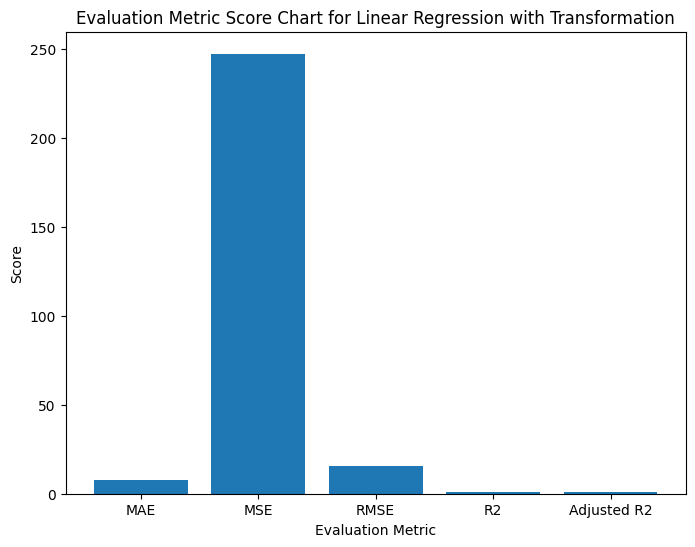

In [95]:

# Visualizing evaluation Metric Score chart
metrics = ['MAE','MSE', 'RMSE', 'R2', 'Adjusted R2']
scores = [MAE,MSE,RMSE,r2,adjusted_r2]

# Plot the evaluation metric score chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart for Linear Regression with Transformation')
plt.show()
     

#####  Ploting the Actival vs Preadected Valuse

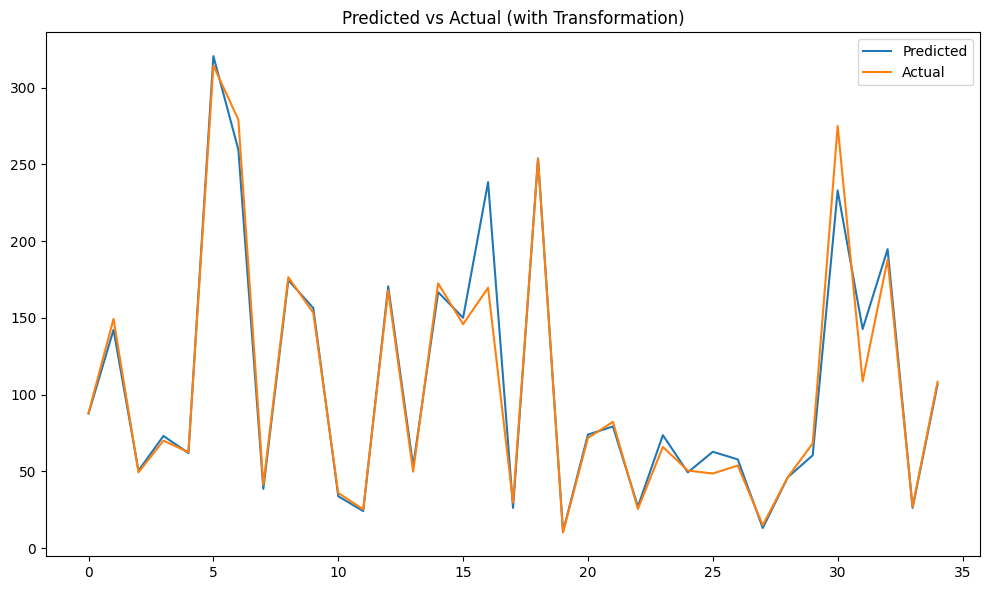

In [96]:
#visualizing actual and predicted data


fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

# Plot with transformation
ax1.plot(10 ** (y_test_pred))
ax1.plot(np.array(10 ** (y_test)))
ax1.legend(["Predicted", "Actual"])
ax1.set_title("Predicted vs Actual (with Transformation)")


plt.tight_layout()
plt.show()

C:\Users\gouse\AppData\Local\Temp\ipykernel_13692\2278833175.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(10**(y_test) - 10**(y_test_pred), bins=20)


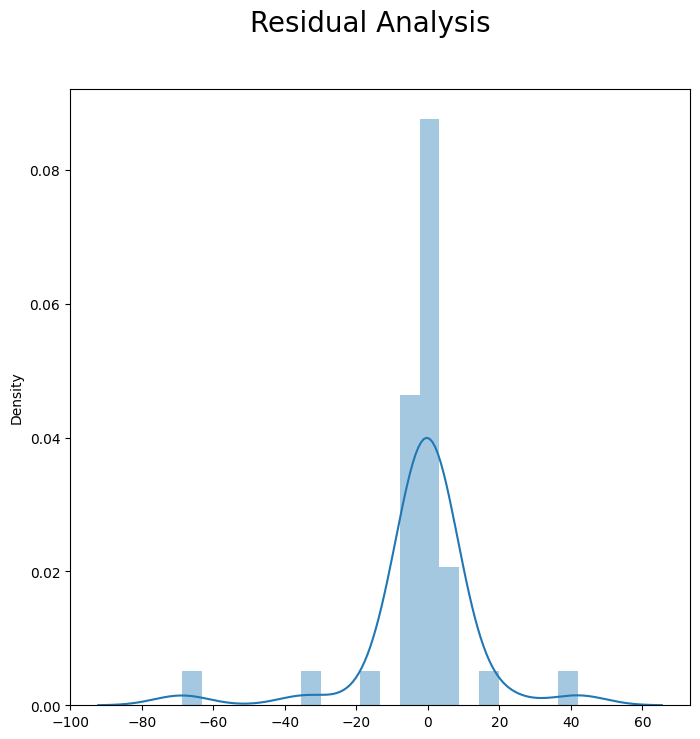

In [98]:

# Create a figure with a specified size
fig = plt.figure(figsize=(8, 8))

# Create a distribution plot (histogram) of the residuals
sns.distplot(10**(y_test) - 10**(y_test_pred), bins=20)

# Set the title for the plot
fig.suptitle('Residual Analysis', fontsize=20)

# Show the plot
plt.show()

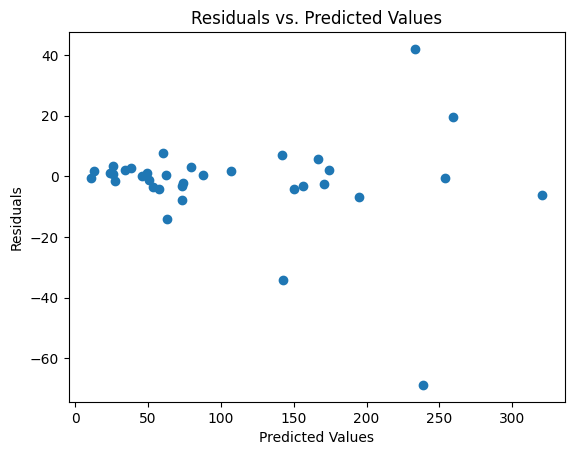

In [100]:
residuals = 10**(y_test)-10**(y_test_pred)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_test_pred),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

In [101]:
linear_regessor_list ={'Train Mean Absolute Error':train_MAE,
                       'Train Mean squared Error' : train_MSE,
                       'Train Root Mean squared Error' : train_RMSE,
                       'Train R2 score' : train_r2,
                       'Train Adjusted R2 score' : train_adjusted_r2,
                       'Mean Absolute Error':MAE,
                       'Mean squared Error' : MSE,
                       'Root Mean squared Error' : RMSE,
                       'R2 score' : r2,
                       'Adjusted R2 score' : adjusted_r2 }
metrics = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()
metrics = metrics.rename(columns={'index':'Metric',0:'reg_with_transformation'})
metrics

,Metric,reg_with_transformation
0,Train Mean Absolute Error,7.979220
1,Train Mean squared Error,165.746038
2,Train Root Mean squared Error,12.874239
3,Train R2 score,0.984231
4,Train Adjusted R2 score,0.982578
5,Mean Absolute Error,7.630076
6,Mean squared Error,247.403276
7,Root Mean squared Error,15.729058
8,R2 score,0.962719
9,Adjusted R2 score,0.939640


The Root Mean Squared Error (RMSE) is slightly higher on the test set (15.729058) compared to the training set (12.874239), indicating a slightly larger average magnitude of error in predicting the 'Close' values on the test set.

The R2 Score is slightly lower on the test set (0.962719) compared to the training set (0.984231), suggesting that the model explains a slightly lower proportion of the variance in the 'Close' variable on the test set.

The Adjusted R2 Score is also lower on the test set (0.939640) compared to the training set (0.984231), accounting for the complexity of the model and the number of independent variables.

Overall, the model performs well on both the training and test sets, but there is a slightly higher level of error and slightly lower explanatory power on the test set, which is expected as the test set represents unseen data.

#### Cross- Validation & Hyperparameter Tuning

In [102]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameter = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

# Create the grid search object
Lr_gs=GridSearchCV(Lr_modle,param_grid=parameter,cv=5,scoring='r2')
# cv = 5 It means the data dplet into 5 parts and perfoming  the model will be trained and tested on different combinations of these parts.

# Fit the Algorithm
Lr_gs.fit(X_train,y_train)

# Predict on the model
y_pred_test_gs=Lr_gs.predict(X_test)
y_pred_train_gs=Lr_gs.predict(X_train)

In [103]:
# Metric Score for train set
train_MAE_gs = mean_absolute_error(10**(y_train),(10**y_pred_train_gs))
print(f"Mean Absolute Error : {train_MAE_gs}")


train_MSE_gs  = mean_squared_error(10**(y_train), 10**(y_pred_train_gs))
print("MSE :" , train_MSE_gs)

train_RMSE_gs = np.sqrt(train_MSE_gs)
print("RMSE :" ,train_RMSE_gs)

train_r2_gs = r2_score(10**(y_train), 10**(y_pred_train_gs))
print("R2 :" ,train_r2_gs)

train_adjusted_r2_gs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_gs)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_gs)

print('\n')

# Metric Score for test set
MAE_gs = mean_absolute_error(10**(y_test),(10**y_pred_test_gs))
print(f"Mean Absolute Error : {MAE_gs}")

MSE_gs  = mean_squared_error(10**(y_test), 10**(y_pred_test_gs))
print("MSE :" , MSE_gs)

RMSE_gs = np.sqrt(MSE_gs)
print("RMSE :" ,RMSE_gs)

r2_gs = r2_score(10**(y_test), 10**(y_pred_test_gs))
print("R2 :" ,r2_gs)

adjusted_r2_gs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_gs)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_gs)
     

Mean Absolute Error : 8.185561637606824
MSE : 222.4837968037266
RMSE : 14.915890747914675
R2 : 0.9788329781906684
Adjusted R2: 0.9766138549364642


Mean Absolute Error : 7.184689713295233
MSE : 128.3933629035817
RMSE : 11.331079511837418
R2 : 0.9806524419596754
Adjusted R2: 0.9686753822204268


The MAE and RMSE values for the test set are lower than those for the train set, indicating better performance on the test data.

The R2 score for the test set is slightly higher than that for the train set, suggesting that the model generalizes well to unseen data.

However, the adjusted R2 score for the test set is lower than that for the train set, indicating that the model may be overfitting to the training data.

Overall, the model shows good performance on both the train and test sets, with low errors and high R2 scores. However, it is important to monitor the adjusted R2 score and consider potential overfitting when interpreting the results. To overcome that, we can apply regularization techniques.

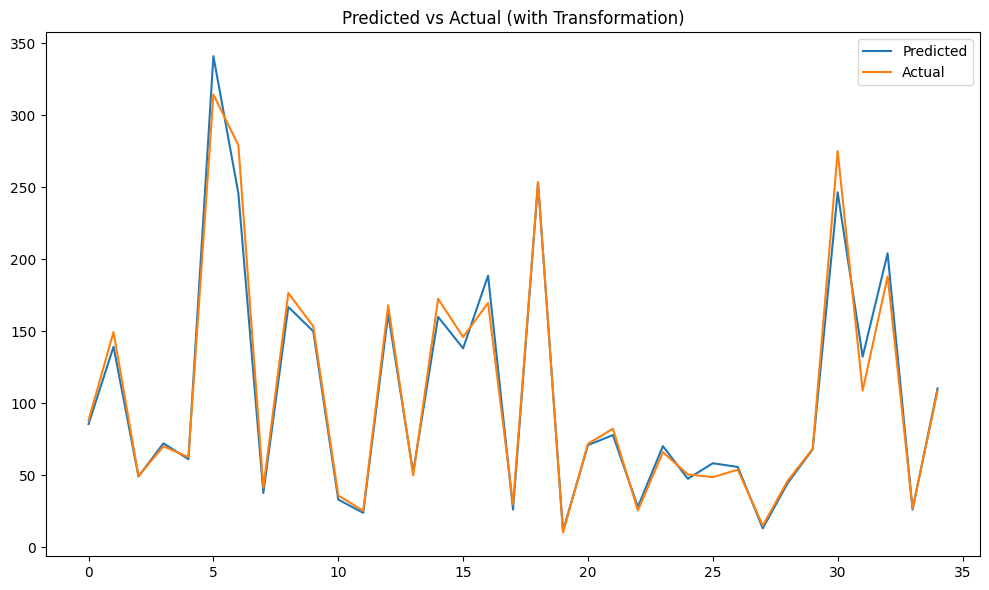

In [104]:

plt.figure(figsize=(10, 6))

# Plot with transformation
plt.plot(10 ** (y_pred_test_gs))
plt.plot(np.array(10 ** (y_test)))
plt.legend(["Predicted", "Actual"])
plt.title("Predicted vs Actual (with Transformation)")

plt.tight_layout()
plt.show()

C:\Users\gouse\AppData\Local\Temp\ipykernel_13692\2282343908.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((10**(y_test)- 10**(y_pred_test_gs)),bins=20)


Text(0.5, 0.98, 'Residual Analysis')

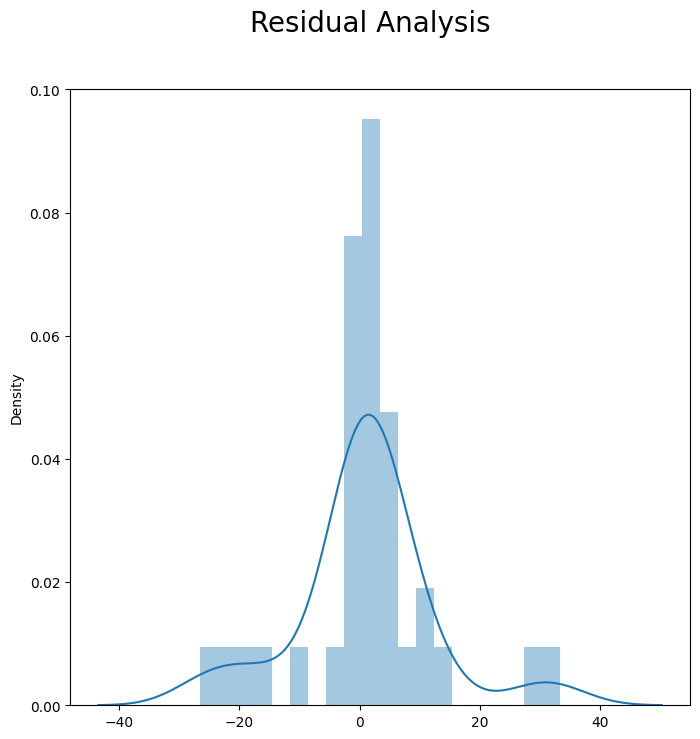

In [105]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred_test_gs)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

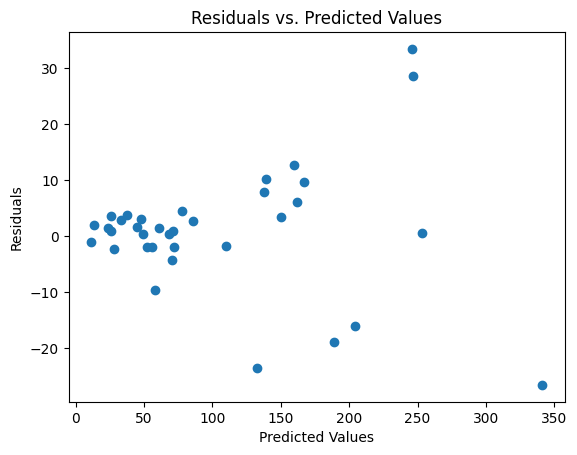

In [106]:

#Homoscadasticity
residuals = 10**(y_test)-10**(y_pred_test_gs)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_pred_test_gs),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [108]:
np.mean(residuals)    

0.8721064355038071

All the assumptions of Linear Regression is being taken care. Mean of Residuals is nearly zero, and there is no hetroscadasticity.

In [112]:
metrics['Lr_gs'] = [train_MAE_gs, train_MSE_gs, train_RMSE_gs, train_r2_gs, train_adjusted_r2_gs, MAE_gs,MSE_gs,RMSE_gs,r2_gs,adjusted_r2_gs]

In [113]:
metrics

,Metric,reg_with_transformation,Lr_gs
0,Train Mean Absolute Error,7.979220,8.185562
1,Train Mean squared Error,165.746038,222.483797
2,Train Root Mean squared Error,12.874239,14.915891
3,Train R2 score,0.984231,0.978833
4,Train Adjusted R2 score,0.982578,0.976614
5,Mean Absolute Error,7.630076,7.184690
6,Mean squared Error,247.403276,128.393363
7,Root Mean squared Error,15.729058,11.331080
8,R2 score,0.962719,0.980652
9,Adjusted R2 score,0.939640,0.968675
